In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [2]:
survey_length = 3.5 # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['y']
bfs = []
# Target number of observations
bfs.append(fs.Target_map_basis_function(filtername='y', target_map=target_map))
# Mask everything but the South
bfs.append(fs.Quadrant_basis_function(quadrants=['S'], azWidth=30., maxAlt=82.))
# throw in the depth percentile for good measure
bfs.append(fs.Depth_percentile_basis_function())

weights = np.array([1., 1., 1.])

#survey = fs.Marching_army_survey(bfs, weights, npick=40)
# Try out pairs!
survey = fs.Marching_army_survey_pairs(bfs, weights, npick=20)
scheduler = fs.Core_scheduler([survey])

In [3]:
observatory = Speed_observatory()#mjd_start=59713.2497538825)
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='y_marching_south.db')

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 114.6%Completed 2772 observations


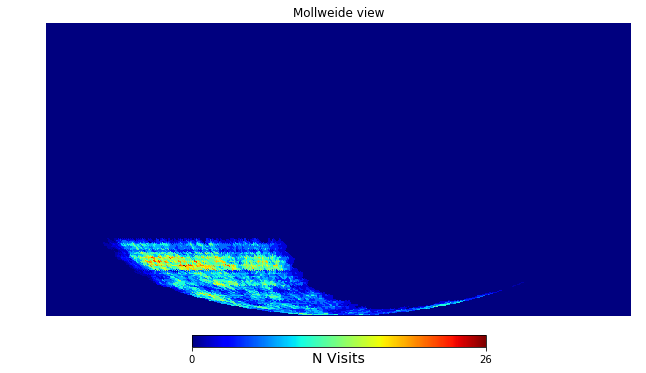

In [4]:
hp.mollview(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature, cmap='jet', unit='N Visits')

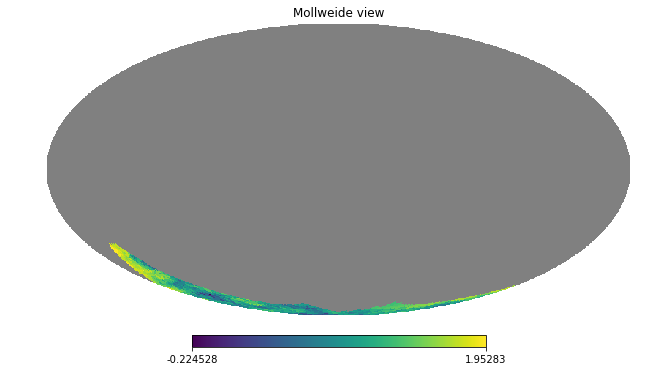

In [9]:
hp.mollview(scheduler.surveys[0].reward)

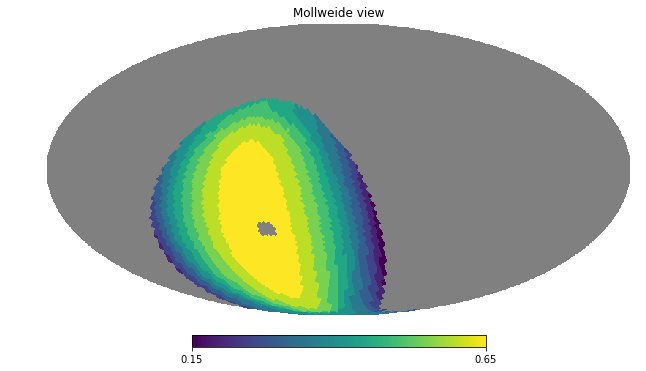

In [10]:
hp.mollview(scheduler.surveys[0].basis_functions[2]() )

In [11]:
scheduler.surveys[0].basis_functions

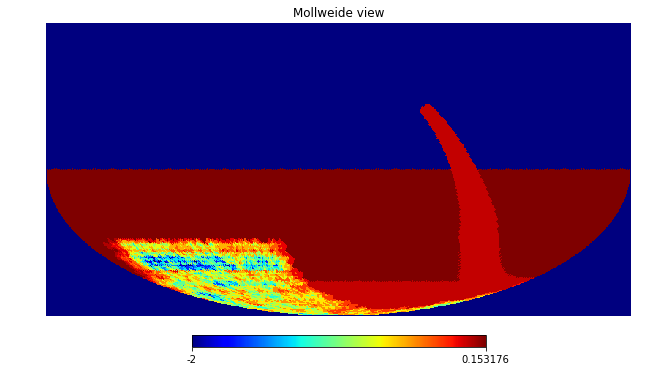

In [12]:
hp.mollview(scheduler.surveys[0].basis_functions[0](), cmap='jet', min=-2)

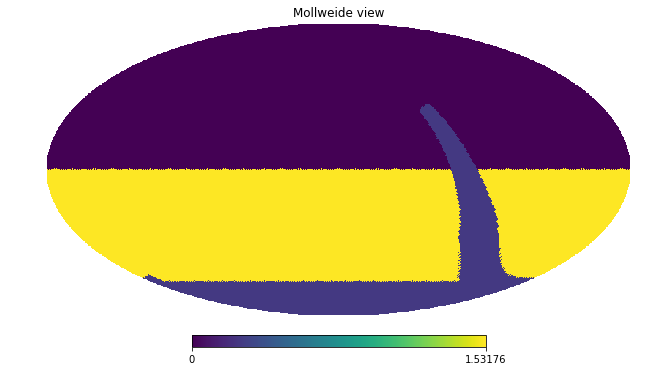

In [13]:
region = np.where(target_map > 0)
n_obs_goal = np.sum(target_map[region])
n_pix_obs = np.sum(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature[region])
n_obs_goal, n_pix_obs
#hp.mollview(target_map-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature/n_pix_obs * n_obs_goal)
hp.mollview(target_map*n_pix_obs/n_obs_goal)
#np.unique(target_map*n_pix_obs/n_obs_goal)
#hp.mollview((target_map*n_pix_obs/n_obs_goal-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature)/10.)

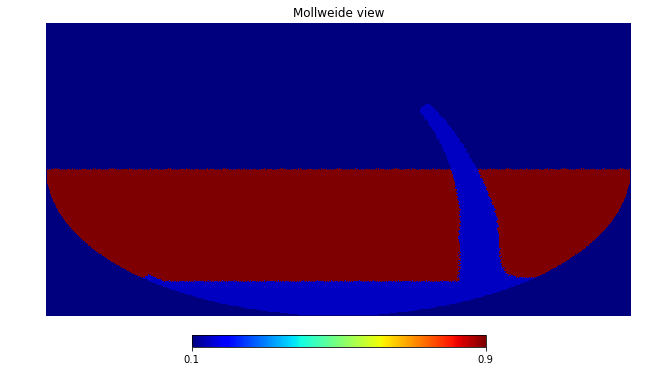

In [10]:
hp.mollview(target_map, min=0.1, cmap='jet')

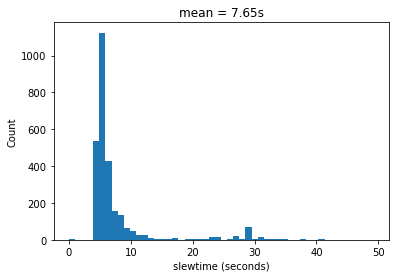

In [14]:
none = plt.hist(observations['slewtime'], bins=50)
plt.xlabel('slewtime (seconds)')
plt.ylabel('Count')
plt.title('mean = %.2fs' % np.mean(observations['slewtime']))

In [15]:
np.mean(observations['slewtime']), np.median(observations['slewtime'])

(7.6547254103851596, 5.5098070479539629)

In [16]:
observations['slewtime'][0:80]

array([  0.        ,   5.35739768,   6.1095148 ,   6.66934409,
         5.36650918,   6.4737575 ,   5.38207309,   5.37022442,
         5.37010758,   9.97968766,   5.35511593,   5.36758366,
         5.50039105,   5.36109274,   6.10676596,   9.86427662,
         4.77201939,   9.29171502,   6.53976364,   7.92227141,
        23.58617158,   5.39081497,   6.72792108,   5.38640587,
         5.38473612,   5.8119636 ,   5.37455576,   5.35497728,
         7.97012842,   5.55015529,   8.11406851,   5.84417508,
         4.76971324,   6.01508981,   8.03453721,  12.52832927,
         4.76660543,  10.78455166,   7.76953699,   8.11658873,
        31.04067769,   5.35912207,   6.02365051,   6.53531371,
         5.36789872,   6.45029245,   5.38241394,   5.37068055,
         9.17416369,   5.35546112,   5.36778904,   5.50714382,
         5.36139608,   6.08550222,   9.82707246,   4.7720334 ,
         9.27181871,   6.5260408 ,   4.76508436,   6.50344862,
        23.60503515,   5.39132558,   6.9165178 ,   5.38

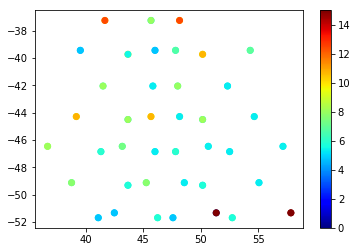

In [17]:
i1 = 0
i2=80
plt.scatter(observations['RA'][i1:i2], observations['dec'][i1:i2], c=observations['slewtime'][i1:i2], cmap='jet', vmax=15)
plt.colorbar()

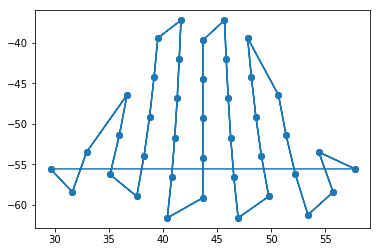

In [15]:
plt.plot(observations['RA'][i1:i2], observations['dec'][i1:i2], 'o-')


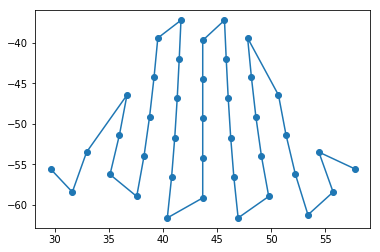

In [16]:
plt.plot(observations['RA'][0:40], observations['dec'][0:40], 'o-')